# Building and Training a Multi-Layer Perceptron - Step by Step

In this notebook, we will walk through the process of constructing and training a multi-layer perceptron (MLP) in a step-by-step manner. We will use the [**`numpy`**](https://numpy.org/) library for implementation. Our journey will begin with a single-layer perceptron, where we will cover the forward pass for making predictions based on inputs and perceptron parameters. We will then delve into the backward pass to compute gradients of the objective function concerning the parameters, paving the way for training using stochastic gradient descent.

Once these foundational steps are covered, we will transition to the creation of a multi-layer perceptron, which involves the composition of single-layer perceptrons.

Throughout this guide, we will use the following notation conventions:

- $(x, y)$ denotes a data/label pair from our training dataset, and $\hat{y}$ represents the model's prediction for a given input $x$.

- The index $i$ signifies the $i^{\text{th}}$ dimension of a vector.

- The exponent $[l]$ refers to an object associated with the $l^{\text{th}}$ layer.

- The exponent $(k)$ is used for objects linked to the $k^{\text{th}}$ example.

For instance:
- $a^{(2)[3]}_5$ signifies the 5th dimension of the activation vector in the 3rd layer [3] for the 2nd training example (2).

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn import datasets

--- 

## Single-Layer Perceptron


### Single-Layer Perceptron - Forward Pass

A single-layer perceptron is a model that connects an input layer (in green, which doesn't perform any operations) to an output layer. The neurons in both layers are linked by weighted connections (synaptic weights) denoted as $W_{xy}$, and each neuron in the output layer carries an additive bias $b_y$. Finally, an activation function $f$ is applied after these operations to obtain the network's prediction $\hat{y}$.

Therefore, we have:

$$\hat{y} = f ( W_{xy} x + b_y )$$

For simplicity, we will define:

$$ z = W_{xy} x + b_y $$

The figure illustrates these operations in the form of a neural network and also as a functional representation to help visualize the order of operations.

<div align=center>
<img src="./resources/perceptron.png" height=300 align=center>
<img src="./resources/perceptron_forward.png" height=250 align=center>
</div>


Please note that the perceptron's parameters, which we will adjust through an optimization process, include the synaptic weights $W_{xy}$ and biases $b_y$. Additionally, for coding convenience, we will consider the choice of the activation function as a parameter.

**Important Note**: In this simplified explanation, we assume that tensors' dimensions are such that the perceptron predicts data one by one. In practice, data is often processed in batches, meaning predictions are made for multiple data points simultaneously. For a batch size of $m$, this implies:

$$ x \in \mathbb{R}^{4 \times m} \quad\text{and}\quad y \in \mathbb{R}^{5 \times m}$$


Let's begin by creating the `dense_layer_forward` function, which computes the prediction of a single-layer perceptron for an input $x$.

In [2]:
def dense_layer_forward(x, Wxy, by, activation):
    """
    Perform a forward pass of a dense layer as described in Figure (2).

    Args:
    x (numpy.ndarray): The input, a numpy array of shape (n_x, m).
    Wxy (numpy.ndarray): The weight matrix multiplying the input, a numpy array of shape (n_y, n_x).
    by (numpy.ndarray): The additive bias added to the output, a numpy array of shape (n_y, 1).
    activation (str): A string indicating the chosen activation function: 'linear', 'sigmoid', or 'relu'.

    Returns:
    numpy.ndarray: The prediction, a numpy array of shape (n_y, m).
    tuple: A tuple of values useful for the backward pass (gradient descent), containing (x, z).
    
    Raises:
    ValueError: If an unsupported activation function is provided.

    Examples:
    >>> x = np.array([[1, 2], [3, 4]])
    >>> Wxy = np.array([[0.1, 0.2], [0.3, 0.4]])
    >>> by = np.array([[0.5], [0.6]])
    >>> activation = 'relu'
    >>> y_pred, cache = dense_layer_forward(x, Wxy, by, activation)
    """
    
    # Calculate z
    z = np.matmul(Wxy, x) + by
    
    # Calculate the output by applying the activation function
    if activation == 'relu':
        y_pred = np.maximum(0, z)
    elif activation == 'sigmoid':
        y_pred = 1. / (1 + np.exp(-z))
    elif activation == 'linear':
        y_pred = z
    else:
        raise ValueError("Unsupported activation function: {}".format(activation))

    # Save the cache for the backward pass
    cache = (x, z)

    return y_pred, cache

In [3]:
import numpy as np

# Test Case 1: Using 'linear' activation
x1 = np.array([[1, 2], [3, 4]])
Wxy1 = np.array([[0.1, 0.2], [0.3, 0.4]])
by1 = np.array([[0.5], [0.6]])
activation1 = 'linear'
y_pred1, cache1 = dense_layer_forward(x1, Wxy1, by1, activation1)
print("Test Case 1:")
print("y_pred1:")
print(y_pred1)
# Expected Output:
# y_pred1:
# [[1.2 1.5]
#  [2.1 2.8]]

# Test Case 2: Using 'sigmoid' activation
x2 = np.array([[-1, 0.5], [2, -3]])
Wxy2 = np.array([[0.2, -0.3], [0.4, -0.1]])
by2 = np.array([[-0.2], [0.1]])
activation2 = 'sigmoid'
y_pred2, cache2 = dense_layer_forward(x2, Wxy2, by2, activation2)
print("\nTest Case 2:")
print("y_pred2:")
print(y_pred2)
# Expected Output:
# y_pred2:
# [[0.26894142 0.68997448]
#  [0.37754067 0.64565631]]

# Test Case 3: Using 'relu' activation
x3 = np.array([[0, -1], [-2, 2]])
Wxy3 = np.array([[0.5, 0.5], [-0.5, -0.5]])
by3 = np.array([[0.2], [0.1]])
activation3 = 'relu'
y_pred3, cache3 = dense_layer_forward(x3, Wxy3, by3, activation3)
print("\nTest Case 3:")
print("y_pred3:")
print(y_pred3)
# Expected Output:
# y_pred3:
# [[0.  0.7]
#  [1.1 0. ]]


Test Case 1:
y_pred1:
[[1.2 1.5]
 [2.1 2.8]]

Test Case 2:
y_pred2:
[[0.26894142 0.68997448]
 [0.37754067 0.64565631]]

Test Case 3:
y_pred3:
[[0.  0.7]
 [1.1 0. ]]


### Single-Layer Perceptron - Backward Pass

In current deep learning libraries, we only need to implement the forward pass, and the backward pass is automatically performed, including gradient computation and parameter updates. However, it's interesting to understand how the backward pass works by implementing it on a simple example.

We need to compute derivatives with respect to the loss function in order to update the network parameters. The backpropagation equations are given below.

\begin{align}
\displaystyle  {dW_{xy}} &~=~ \frac{\partial J}{\partial W_{xy}} =~ dz \cdot x^{T}\tag{1} \\[8pt]
\displaystyle db_{y} &~=~ \frac{\partial J}{\partial b_y} ~=~ \sum_{batch}dz\tag{2} \\[8pt]
\displaystyle dx &~=~ \frac{\partial J}{\partial x} ~=~ { W_{xy}}^T \cdot dz \tag{3}  \\[8pt]
\end{align}

Here J denotes the loss function, $\times$ denotes element-wise multiplication and $\cdot$ denotes matrix multiplication. Additionally:
* $\texttt{dz}$ represents $\frac{\partial J}{\partial z} = \frac{\partial J}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial z}$
* $\texttt{dWxy}$ represents $\frac{\partial J}{\partial W_{xy}}$
* $\texttt{dby}$ represents $\frac{\partial J}{\partial b_y}$
* $\texttt{dx}$ represents $\frac{\partial J}{\partial x}$

These names have been chosen for use in the code. We also note : 
* $\texttt{dy\_dz}$ for $\frac{\partial\hat{y}}{\partial z}$
* $\texttt{dy\_hat}$ for $\frac{\partial J}{\partial\hat{y}}$

In [4]:
def dense_layer_backward(dy_hat, Wxy, by, activation, cache):
    """
    Perform the backward pass for a dense layer.

    Args:
    dy_hat (numpy.ndarray): Gradient of the loss J with respect to the output ŷ, of shape (n_y, m).
    Wxy (numpy.ndarray): Weight matrix Wxy, of shape (n_y, n_x).
    by (numpy.ndarray): Bias vector by, of shape (n_y, 1).
    activation (str): The chosen activation function: 'linear', 'sigmoid', or 'relu'.
    cache (tuple): Tuple of values useful for the backward pass, containing (x, z), where x is the input matrix
                   of shape (n_x, m) and z is the hidden state matrix of shape (n_y, m).

    Returns:
    dict: A dictionary containing the following gradients:
        - 'dx' (numpy.ndarray): Gradients with respect to inputs, of shape (n_x, m).
        - 'dby' (numpy.ndarray): Gradients with respect to biases, of shape (n_y, 1).
        - 'dWxy' (numpy.ndarray): Gradients with respect to weight matrix Wxy, of shape (n_y, n_x).

    Raises:
    ValueError: If an unsupported activation function is provided.

    Examples:
    >>> x = np.array([[1, 2], [3, 4]])
    >>> Wxy = np.array([[0.1, 0.2], [0.3, 0.4]])
    >>> by = np.array([[0.5], [0.6]])
    >>> activation = 'relu'
    >>> y_pred, cache = dense_layer_forward(x, Wxy, by, activation)
    >>> dy_hat = np.array([[0.1, 0.2], [0.3, 0.4]])
    >>> gradients = dense_layer_backward(dy_hat, Wxy, by, activation, cache)
    """

    # Retrieve the cache
    (x, z) = cache

    # Calculate the gradient of the output ŷ with respect to the hidden state z
    if activation == 'relu':
        dy_dz = np.where(z > 0, 1, 0)
    elif activation == 'sigmoid':
        dy_dz = np.exp(-z) / np.square(1 + np.exp(-z))
    elif activation == 'linear':
        dy_dz = np.ones(dy_hat.shape)
    else:
        raise ValueError("Unsupported activation function: {}".format(activation))

    dz = dy_hat * dy_dz

    # Calculate the gradient of the loss with respect to x
    dx = np.matmul(np.transpose(Wxy), dz)

    # Calculate the gradient of the loss with respect to Wxy
    dWxy = np.matmul(dz, np.transpose(x))

    # Calculate the gradient of the loss with respect to by
    dby = np.sum(dz, axis=1, keepdims=True)

    # Store the gradients in a dictionary
    gradients = {"dx": dx, "dby": dby, "dWxy": dWxy}

    return gradients


In [5]:
# Test Case 1: Gradient calculation for a ReLU activation
dy_hat_1 = np.array([[0.1, 0.2], [0.3, 0.4]])
Wxy_1 = np.array([[0.5, 0.6], [0.7, 0.8]])
by_1 = np.array([[0.1], [0.2]])
activation_1 = 'relu'
cache_1 = (np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]]))
gradients_1 = dense_layer_backward(dy_hat_1, Wxy_1, by_1, activation_1, cache_1)
print(gradients_1)
# Expected results:
# dx_1 should be [[0.26, 0.38], [0.3 , 0.44]]
# dby_1 should be [[0.3], [0.7]]
# dWxy_1 should be [[0.5, 1.1], [1.1, 2.5]]

# Test Case 2: Gradient calculation for a sigmoid activation
dy_hat_2 = np.array([[0.1, 0.2], [0.3, 0.4]])
Wxy_2 = np.array([[0.5, 0.6], [0.7, 0.8]])
by_2 = np.array([[0.1], [0.2]])
activation_2 = 'sigmoid'
cache_2 = (np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]]))
gradients_2 = dense_layer_backward(dy_hat_2, Wxy_2, by_2, activation_2, cache_2)
print(gradients_2)
# Expected results:
# dx_2 should be approximately [0.00052355, 0.00034052], [0.00061734, 0.00040326]]
# dby_2 should be approximately [[0.00115811], [0.00040716]]
# dWxy_2 should be approximately [[0.00165141, 0.00396762], [0.00054126, 0.00135558]]

# Test Case 3: Gradient calculation for a linear activation
dy_hat_3 = np.array([[0.1, 0.2], [0.3, 0.4]])
Wxy_3 = np.array([[0.5, 0.6], [0.7, 0.8]])
by_3 = np.array([[0.1], [0.2]])
activation_3 = 'linear'
cache_3 = (np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]]))
gradients_3 = dense_layer_backward(dy_hat_3, Wxy_3, by_3, activation_3, cache_3)
print(gradients_3)
# Expected results:
# dx_3 should be [[0.26, 0.38], [0.3 , 0.44]]
# dby_3 should be [[0.3], [0.7]]
# dWxy_3 should be [[0.5, 1.1], [1.1, 2.5]]

{'dx': array([[0.26, 0.38],
       [0.3 , 0.44]]), 'dby': array([[0.3],
       [0.7]]), 'dWxy': array([[0.5, 1.1],
       [1.1, 2.5]])}
{'dx': array([[0.00052355, 0.00034052],
       [0.00061734, 0.00040326]]), 'dby': array([[0.00115811],
       [0.00040716]]), 'dWxy': array([[0.00165141, 0.00396762],
       [0.00054126, 0.00135558]])}
{'dx': array([[0.26, 0.38],
       [0.3 , 0.44]]), 'dby': array([[0.3],
       [0.7]]), 'dWxy': array([[0.5, 1.1],
       [1.1, 2.5]])}


Now, we can create a `DenseLayer` class, which includes attributes containing all the necessary information to describe a dense layer, namely:

* The number of neurons in the input of the dense layer $\texttt{input\_size}$.
* The number of neurons in the output of the dense layer $\texttt{output\_size}$
* The chosen activation function for this layer $\texttt{activation}$
* The synaptic weights of the dense layer, stored in a matrix of size ($\texttt{output\_size}$, $\texttt{input\_size}$) : $\texttt{Wxy}$
* The biases of the dense layer, stored in a vector of size ($\texttt{output\_size}$, 1) : $\texttt{by}$

We also add a `cache` attribute that will store the inputs to the dense layer $\texttt{x}$ as well as the intermediate calculations $\texttt{z}$ performed during the forward pass, to be reused for the backward pass.


In [6]:
import math
import numpy as np

class DenseLayer:
    def __init__(self, input_size, output_size, activation):
        """
        Initialize a dense layer with specified input size, output size, and activation function.

        Args:
        input_size (int): Number of neurons in the input of the layer.
        output_size (int): Number of neurons in the output of the layer.
        activation (str): The chosen activation function: 'linear', 'sigmoid', or 'relu'.
        """
        self.input_size = input_size
        self.output_size = output_size
        self.activation = activation
        
        # Cache will be updated during the forward pass
        self.cache = None
        
        # Initialize weights using the Glorot uniform distribution
        limit = math.sqrt(6 / (input_size + output_size)) 
        self.Wxy = np.random.uniform(low=-limit, high=limit, size=(output_size, input_size))
        self.by = np.random.uniform(low=-limit, high=limit, size=(output_size, 1))

    def forward(self, x_batch):
        """
        Perform a forward pass of the dense layer.

        Args:
        x_batch (numpy.ndarray): The input data for this batch, of shape (input_size, m).

        Returns:
        numpy.ndarray: The prediction, of shape (output_size, m).
        """
        y, cache = dense_layer_forward(x_batch, self.Wxy, self.by, self.activation)
        self.cache = cache
        return y

    def backward(self, dy):
        """
        Perform a backward pass of the dense layer to calculate gradients.

        Args:
        dy (numpy.ndarray): The gradient of the loss J with respect to the output ŷ, of shape (output_size, m).

        Returns:
        dict: A dictionary containing the gradients:
            - 'dWxy' (numpy.ndarray): Gradients with respect to weights, of shape (output_size, input_size).
            - 'dby' (numpy.ndarray): Gradients with respect to biases, of shape (output_size, 1).
            - 'dx' (numpy.ndarray): Gradients with respect to inputs, of shape (input_size, m).
        """
        return dense_layer_backward(dy, self.Wxy, self.by, self.activation, self.cache)

    def update_parameters(self, gradients, learning_rate):
        """
        Update the layer's parameters (weights and biases) using gradient descent.

        Args:
        gradients (dict): A dictionary containing the gradients:
            - 'dWxy' (numpy.ndarray): Gradients with respect to weights, of shape (output_size, input_size).
            - 'dby' (numpy.ndarray): Gradients with respect to biases, of shape (output_size, 1).
        learning_rate (float): The learning rate for gradient descent.
        """
        self.Wxy -= learning_rate * gradients["dWxy"]
        self.by  -= learning_rate * gradients["dby"]

### Stochastic Gradient Descent Training

To train our model, we need to set up an optimizer. We will implement stochastic gradient descent with mini-batches. However, before that, we need to implement the cost functions that we will use to evaluate the quality of our predictions.

We will use :
* mean squared error, which, when used with a linear activation function (identity), is suitable for solving regression problems.
* binary cross entropy, which is suitable for solving binary classification problems. 

Both cost functions takes two parameters as input: the ground truth $\texttt{y\_true}$ and the model's prediction $\texttt{y\_pred}$. Both of these matrices have dimensions $\texttt{bs} \times \texttt{output\_size}$. The functions return two values: 
* $\texttt{loss}$ which corresponds to :
  * the mean squared error of the predictions compared to the ground truth
  * the binary cross entropy of the predictions compared to the ground truth
* $\texttt{grad}$ which is the gradient of :
  * the mean squared error with respect to the predictions.
  * the binary cross entropy error with respect to the predictions.

In other words:

$$ \text{grad}  = \frac{\partial J_{mb}}{\partial \hat{y}}$$

where $\hat{y}$ corresponds to $\texttt{y\_pred}$, and $J_{mb}$ is the objective function computed on a mini-batch $mb$ of data.


In [7]:
def mean_square_error(y_true, y_pred):
    """
    Compute the Mean Square Error (MSE) loss and its gradient.

    Parameters:
    y_true : numpy.ndarray
        The true target values.
    y_pred : numpy.ndarray
        The predicted values.

    Returns:
    loss : numpy.float64
        The Mean Square Error loss.
    grad : numpy.ndarray
        The gradient of the loss with respect to y_pred.

    Notes:
    - The Mean Square Error (MSE) loss measures the average squared difference between
      the true target values and the predicted values.
    - The gradient is computed with respect to y_pred and is used in optimization
      algorithms like gradient descent.

    Example:
    >>> y_true = np.array([1.0, 2.0, 3.0])
    >>> y_pred = np.array([0.9, 2.2, 2.8])
    >>> loss, grad = mean_square_error(y_true, y_pred)
    >>> print(loss)
    0.030000000000000044
    >>> print(grad)
    array([-0.06666667,  0.13333333, -0.13333333])

    """
    loss = np.mean(np.square(y_true - y_pred))
    grad = -2 * (y_true - y_pred) / y_true.shape[0]

    return loss, grad

def binary_cross_entropy(y_true, y_pred):
    """
    Compute the binary cross-entropy loss and gradient.

    Args:
    y_true (numpy.ndarray): The true labels of shape (batch_size, 1).
    y_pred (numpy.ndarray): The predicted probabilities of shape (batch_size, 1).

    Returns:
    tuple: A tuple containing:
        - loss (float): The binary cross-entropy loss.
        - grad (numpy.ndarray): The gradient of the loss with respect to y_pred.
    """

    loss = np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))
    grad = (-y_true / y_pred + (1 - y_true) / (1 - y_pred)) / y_true.shape[0]

    return loss, grad


### Stochastic Gradient Descent

Stochastic gradient descent takes the following parameters as input:

* $\texttt{x\_train}$ and $\texttt{y\_train}$: the data and labels of the training set, assumed to have a size of $N$.
* $\texttt{model}$: an instance of the model to be trained (which must implement the three functions seen earlier: $\texttt{forward}$, $\texttt{backward}$, and $\texttt{update\_parameters}$).
* $\texttt{loss\_function}$: can take two values: '$\texttt{mse}$' (mean squared error) or '$\texttt{bce}$' (binary cross-entropy).
* $\texttt{learning\_rate}$: the chosen learning rate for gradient descent.
* $\texttt{epochs}$: the number of complete passes through the training set to perform.
* $\texttt{batch\_size}$: the desired mini-batch size for stochastic gradient descent.

The algorithm to implement is summarized below:

```
N_batch = floor(N/batch_size)

loop epochs times

  for b from 1 to N_batch do

    # Select the data x_train_batch and labels y_train_batch for the b-th mini-batch.
    # Compute the model's prediction y_pred_batch for this mini-batch.
    # Calculate the batch_loss and the gradient of the loss batch_grad with respect to the predictions on this mini-batch.
    # Calculate the gradients of the loss with respect to each parameter of the model.
    # Update the model's parameters.

  end for

end loop
```

Two additional remarks:

* For each epoch, the mini-batches must be different (the data should be distributed across different mini-batches).
* It is useful to calculate (and display!) the averaged loss over the entire training set after each epoch. To do this, you can accumulate the losses of each mini-batch during an epoch and divide the total by the number of mini-batches.



In [8]:
def SGD(x_train, y_train, model, loss_function, learning_rate, epochs, batch_size):
    """
    Train a model using Stochastic Gradient Descent (SGD).

    Args:
    x_train (numpy.ndarray): The training data of shape (N, input_size).
    y_train (numpy.ndarray): The training labels of shape (N, output_size).
    model (object): An instance of the model to be trained.
    loss_function (str): The loss function to be used: 'mse' (mean squared error) or 'bce' (binary cross-entropy).
    learning_rate (float): The learning rate for gradient descent.
    epochs (int): The number of complete passes through the training data.
    batch_size (int): The mini-batch size.

    Returns:
    object: The trained model.

    Note:
    - During training, the model parameters are updated using SGD.
    - The loss is printed at the end of each epoch.
    """

    # Number of batches per epoch
    nb_batches = math.floor(x_train.shape[0] / batch_size)

    # To manage random batch sampling from training data, generate and permute indices
    indices = np.arange(x_train.shape[0])
    indices = np.random.permutation(indices)

    for e in range(epochs):
        running_loss = 0

        for b in range(nb_batches):
            # Select data for the current batch
            x_train_batch = x_train[indices[b * batch_size:(b + 1) * batch_size]]
            y_train_batch = y_train[indices[b * batch_size:(b + 1) * batch_size]]

            # Predictions for the current batch
            y_pred_batch = model.forward(np.transpose(x_train_batch))

            # Calculate loss and gradients for the current batch
            if loss_function == 'mse':
                batch_loss, batch_gradients = mean_square_error(y_train_batch, y_pred_batch)
            elif loss_function == 'bce':
                batch_loss, batch_gradients = binary_cross_entropy(y_train_batch, y_pred_batch)

            running_loss += batch_loss

            # Calculate gradients of loss with respect to model parameters
            param_updates = model.backward(batch_gradients)

            # Update model parameters
            model.update_parameters(param_updates, learning_rate)

        print("Epoch %4d : Loss : %.4f" % (e, float(running_loss / nb_batches)))

        # Permute data for the next epoch
        indices = np.random.permutation(indices)

    return model


## Use Case 1 : Regression

The following code block generates and displays training and test datasets for a classic linear regression problem.

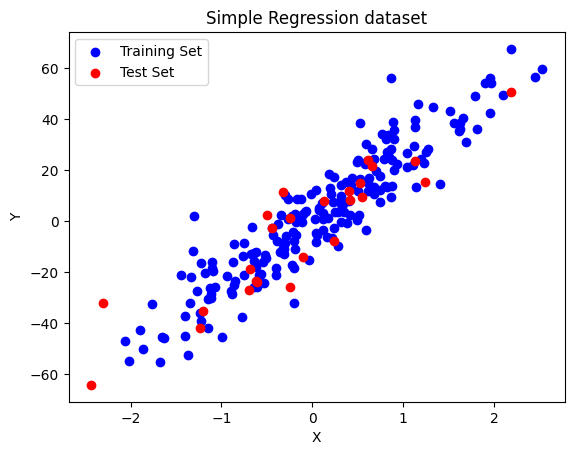

In [9]:
import matplotlib.pyplot as plt

x, y = datasets.make_regression(n_samples=250, n_features=1, n_targets=1, random_state=1, noise=10)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/10, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/9, random_state=1)

# Create scatter plot for the training set (blue)
plt.scatter(x_train, y_train, color='blue', label='Training Set')

# Create scatter plot for the test set (red)
plt.scatter(x_test, y_test, color='red', label='Test Set')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Simple Regression dataset")
plt.legend()
plt.savefig("./outputs/reg_dataset.png")

# Show the plot
plt.show()

We then train our model and use it to visualize the linear regression line.

Epoch    0 : Loss : 281.8643
Epoch    1 : Loss : 92.2451
Epoch    2 : Loss : 89.4087
Epoch    3 : Loss : 88.2539
Epoch    4 : Loss : 88.2877
Epoch    5 : Loss : 90.8262
Epoch    6 : Loss : 88.7571
Epoch    7 : Loss : 90.2318
Epoch    8 : Loss : 88.6606
Epoch    9 : Loss : 89.1703


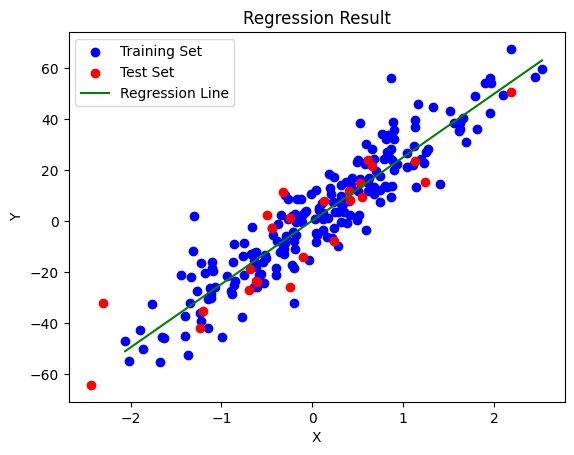

In [10]:
model = DenseLayer(input_size=1, output_size=1, activation="linear")
model = SGD(
    x_train = x_train,
    y_train = y_train, 
    model = model, 
    loss_function = "mse", 
    learning_rate = 0.1,
    epochs = 10,
    batch_size = 20
    )

# Add a linear regression line to the plot
regression_line_x = np.linspace(min(x_train), max(x_train), 100)
regression_line_y = [float(model.forward([x])) for x in regression_line_x]

# Create scatter plot for the training set (blue)
plt.scatter(x_train, y_train, color='blue', label='Training Set')

# Create scatter plot for the test set (red)
plt.scatter(x_test, y_test, color='red', label='Test Set')

plt.plot(regression_line_x, regression_line_y, color='green', label='Regression Line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title("Regression Result")
plt.savefig("./outputs/reg_result.png")

# Show the plot
plt.show()

## Use Case 2 : Binary Classification

Now we will test our single-layer perceptron on a binary classification problem.

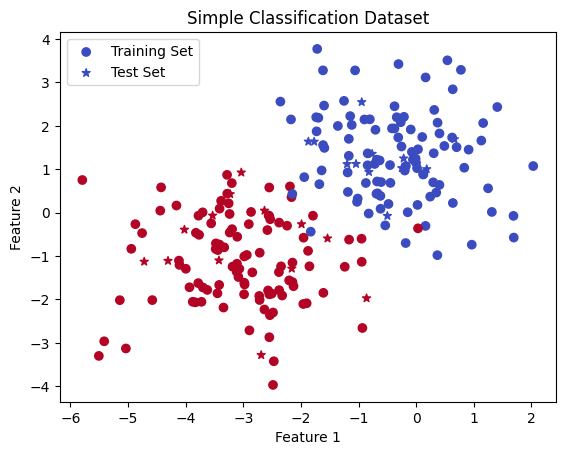

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Generate synthetic data for binary classification
x, y = make_blobs(n_samples=250, n_features=2, centers=2, center_box=(-3, 3), random_state=1)

# Split the data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/10, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/9, random_state=1)

# Create scatter plots for the training and test data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', marker='o', label='Training Set')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='coolwarm', marker='*', label='Test Set')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Simple Classification Dataset")
plt.savefig("./outputs/classification_dataset.png")

# Show the plot
plt.show()

Epoch    0 : Loss : 0.3509
Epoch    1 : Loss : 0.2084
Epoch    2 : Loss : 0.1689
Epoch    3 : Loss : 0.1495
Epoch    4 : Loss : 0.1374
Epoch    5 : Loss : 0.1278
Epoch    6 : Loss : 0.1203
Epoch    7 : Loss : 0.1137
Epoch    8 : Loss : 0.1088
Epoch    9 : Loss : 0.1043
Epoch   10 : Loss : 0.1003
Epoch   11 : Loss : 0.0974
Epoch   12 : Loss : 0.0946
Epoch   13 : Loss : 0.0922
Epoch   14 : Loss : 0.0897
Epoch   15 : Loss : 0.0873
Epoch   16 : Loss : 0.0857
Epoch   17 : Loss : 0.0843
Epoch   18 : Loss : 0.0823
Epoch   19 : Loss : 0.0816
Epoch   20 : Loss : 0.0799
Epoch   21 : Loss : 0.0791
Epoch   22 : Loss : 0.0776
Epoch   23 : Loss : 0.0766
Epoch   24 : Loss : 0.0759
Epoch   25 : Loss : 0.0751
Epoch   26 : Loss : 0.0746
Epoch   27 : Loss : 0.0733
Epoch   28 : Loss : 0.0728
Epoch   29 : Loss : 0.0722
Epoch   30 : Loss : 0.0716
Epoch   31 : Loss : 0.0710
Epoch   32 : Loss : 0.0705
Epoch   33 : Loss : 0.0698
Epoch   34 : Loss : 0.0698
Epoch   35 : Loss : 0.0691
Epoch   36 : Loss : 0.0689
E

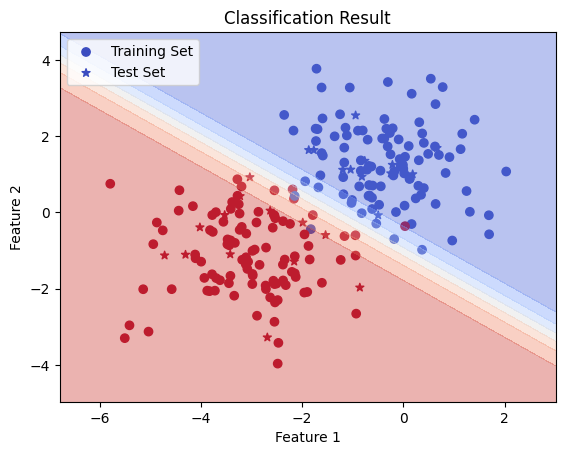

In [12]:
model = DenseLayer(input_size=2, output_size=1, activation="sigmoid")
model = SGD(
    x_train = x_train,
    y_train = y_train, 
    model = model, 
    loss_function = "bce", 
    learning_rate = 0.3,
    epochs = 50,
    batch_size = 20
    )

# Create scatter plots for the training and test data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', marker='o', label='Training Set')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='coolwarm', marker='*', label='Test Set')

# Create the logistic regression line
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.forward(np.transpose(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Classification Result")
plt.savefig("./outputs/classification_result.png")

plt.legend()
plt.show()


---

## Multi-Layer Perceptron

<!-- We will now construct a multi-layer perceptron based on the previously developed single-layer perceptron. The idea is to concatenate single-layer perceptrons by using the output of the previous layer as the input to the current layer.

By recognizing this, we can create a `MultiLayerPerceptron` class. In particular, the `add_layer` function allows adding the input *layer* to the MLP. -->

Starting from the single-layer perceptron created earlier, we can now implement a multi-layer perceptron, which is a true neural network as it involves multiple layers of successive neurons. In practice, the multi-layer perceptron is a composition of single-layer perceptrons, each taking as input the activation output of the previous layer. Let's take the example below:


<div align="center">
  <img src="./resources/multicouches.png" height=350>
</div>

This multi-layer perceptron is a composition of two single-layer perceptrons, the first connecting two input neurons to two output neurons, and the second connecting two input neurons to one output neuron.

<div align="center">
  <img src="./resources/multicouche_fonct.png" height=350>
</div>

Here's how we'll implement it: the multi-layer perceptron is simply a list of single-layer perceptrons (`DenseLayer`). At initialization, the multi-layer perceptron is an empty list, in which it is possible to add dense layers (using the `add_layer()` function).

```python
model = MultiLayerPerceptron()
model.add_layer(DenseLayer(2, 2, 'relu'))
model.add_layer(DenseLayer(2, 1, 'sigmoid'))
```

The `forward()` function of the multi-layer perceptron consists of the successive calculation of the output of the dense layers. Each dense layer makes a prediction based on the output of the previous dense layer.

The `backward()` function implements the gradient backpropagation algorithm. The gradients of the parameters of the last layer are calculated first and are used to calculate the gradients of the previous layer, as illustrated in this figure:
<div align="center">
  <img src="./resources/multicouche_retropropagation.png" height=350>
</div>
```


In [13]:
import numpy as np

class MultiLayerPerceptron:
    """
    MultiLayerPerceptron class for building a multi-layer perceptron neural network.

    Attributes:
        layers (list): List to store layers of the neural network.

    Methods:
        add_layer(layer): Adds a layer to the neural network.
        forward(x_batch): Performs forward propagation through the network.
        backward(dy): Performs backward propagation through the network.
        update_parameters(gradients, learning_rate): Updates the parameters of each layer.

    """

    def __init__(self):
        """
        Initializes an empty MultiLayerPerceptron.
        """
        self.layers = []

    def add_layer(self, layer):
        """
        Adds a layer to the neural network.

        Args:
            layer: The layer to add.

        """
        self.layers.append(layer)

    def forward(self, x_batch):
        """
        Performs forward propagation through the network.

        Args:
            x_batch (numpy.ndarray): The input batch.

        Returns:
            numpy.ndarray: The output of the network.

        """
        output_l = x_batch

        for i in range(len(self.layers)):
            # Pass the output of the previous layer as input to the current layer
            input_l = output_l
            output_l = self.layers[i].forward(input_l)

        # The output of the last layer is the final output of the network
        y = output_l

        return y

    def backward(self, dy):
        """
        Performs backward propagation through the network.

        Args:
            dy (numpy.ndarray): The gradient of the loss with respect to the output.

        Returns:
            list: List of gradients for each layer.

        """
        gradients = []

        for i in reversed(range(len(self.layers))):
            # Pass the output of the previous layer as input to the current layer
            layer_gradients = self.layers[i].backward(dy)
            gradients.append(layer_gradients)
            dy = layer_gradients["dx"]

        gradients.reverse()
        return gradients

    def update_parameters(self, gradients, learning_rate):
        """
        Updates the parameters of each layer using gradients and a learning rate.

        Args:
            gradients (list): List of gradients for each layer.
            learning_rate (float): The learning rate for parameter updates.

        """
        for i in range(len(self.layers)):
            self.layers[i].update_parameters(gradients[i], learning_rate)

## Application : Binary Classification

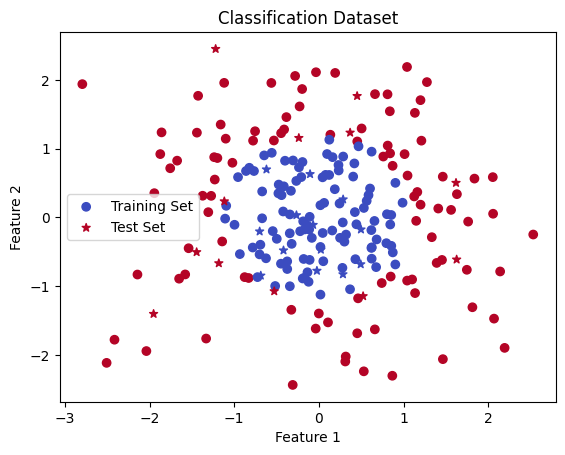

In [14]:
x, y = datasets.make_gaussian_quantiles(n_samples=250, n_features=2, n_classes=2, random_state=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/10, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/9, random_state=1)

# Create scatter plots for the training and test data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', marker='o', label='Training Set')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='coolwarm', marker='*', label='Test Set')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Classification Dataset")
plt.savefig("./outputs/complex_classification_dataset.png")

plt.show()

In [15]:
def print_decision_boundaries(model, x, y):
    """
    Print decision boundaries for a given classification model.

    Args:
        model: The trained classification model.
        x (numpy.ndarray): Input data.
        y (numpy.ndarray): True labels.

    """
    # Make these smaller to increase the resolution
    dx, dy = 0.1, 0.1

    # Generate 2D grids for the x and y bounds
    y_grid, x_grid = np.mgrid[slice(-4, 4 + dy, dy), slice(-4, 4 + dx, dx)]

    x_gen = np.concatenate((np.expand_dims(np.reshape(y_grid, (-1)), 1),
                            np.expand_dims(np.reshape(x_grid, (-1)), 1)), axis=1)
    z_gen = model.forward(np.transpose(x_gen)).reshape(x_grid.shape)

    z_min, z_max = 0, 1

    c = plt.pcolor(x_grid, y_grid, z_gen, cmap='RdBu', vmin=z_min, vmax=z_max)
    plt.colorbar(c)
    plt.plot(x[y == 0, 0], x[y == 0, 1], 'r.', label = "First class")
    plt.plot(x[y == 1, 0], x[y == 1, 1], 'b.', label = "Second class")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title("Classification Result")
    plt.savefig("./outputs/complex_classification_result.png")

    plt.show()

Epoch    0 : Loss : 0.7506
Epoch    1 : Loss : 0.7140
Epoch    2 : Loss : 0.6933
Epoch    3 : Loss : 0.6751
Epoch    4 : Loss : 0.6590
Epoch    5 : Loss : 0.6429
Epoch    6 : Loss : 0.6292
Epoch    7 : Loss : 0.6163
Epoch    8 : Loss : 0.6021
Epoch    9 : Loss : 0.5877
Epoch   10 : Loss : 0.5734
Epoch   11 : Loss : 0.5580
Epoch   12 : Loss : 0.5427
Epoch   13 : Loss : 0.5254
Epoch   14 : Loss : 0.5080
Epoch   15 : Loss : 0.4923
Epoch   16 : Loss : 0.4797
Epoch   17 : Loss : 0.4667
Epoch   18 : Loss : 0.4516
Epoch   19 : Loss : 0.4373
Epoch   20 : Loss : 0.4273
Epoch   21 : Loss : 0.4207
Epoch   22 : Loss : 0.4067
Epoch   23 : Loss : 0.3950
Epoch   24 : Loss : 0.3928
Epoch   25 : Loss : 0.3787
Epoch   26 : Loss : 0.3686
Epoch   27 : Loss : 0.3653
Epoch   28 : Loss : 0.3514
Epoch   29 : Loss : 0.3436
Epoch   30 : Loss : 0.3302
Epoch   31 : Loss : 0.3235
Epoch   32 : Loss : 0.3193
Epoch   33 : Loss : 0.3065
Epoch   34 : Loss : 0.2952
Epoch   35 : Loss : 0.2900
Epoch   36 : Loss : 0.2852
E

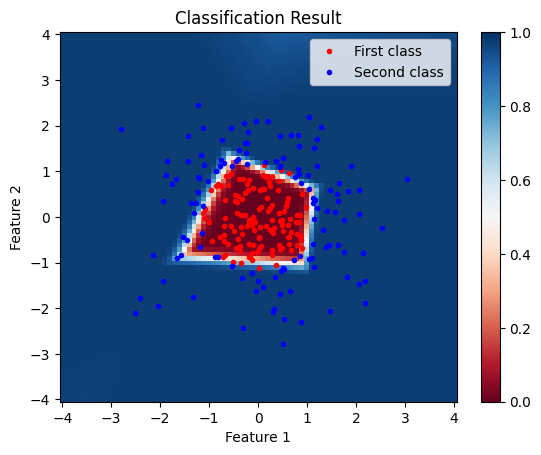

In [16]:
# Initialize your MultiLayerPerceptron model
model = MultiLayerPerceptron()

# Define your neural network architecture by adding layers to the model
model.add_layer(DenseLayer(2, 4, "relu"))
model.add_layer(DenseLayer(4, 3, "relu"))
model.add_layer(DenseLayer(3, 1, "sigmoid"))

# Initialize the Stochastic Gradient Descent optimizer
model = SGD(
    x_train = x_train,
    y_train = y_train, 
    model = model, 
    loss_function = "bce", 
    learning_rate = 0.08,
    epochs = 200,
    batch_size = 20
    )

# Print decision boundaries to visualize the model's performance
print_decision_boundaries(model, x, y)